**Fetch Data From BigQuery**

In [ ]:
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project phonic-sunbeam-443308-r6
SELECT * FROM `phonic-sunbeam-443308-r6.travel_dataset.ml_features` #this table name was set based on the table you chose to query

Query is running:   0%|          |

Downloading:   0%|          |

# Dataset

In [ ]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,name,year,co2_emissions_carbon_tonnes,gh_emissions_co2_tonnes,deforestation_per_area,tree_loss_from_wildfires_ha,energy_consumption_twh,precipitation,avg_surface_temp_C,gdp_ppp_per_capita,...,disease_death_val,intl_tourist_spending,in_tour_arrivals_ovn_vis_tourists,overall_infrastructure_score,basic_infrastructure_score,technological_infrastructure_score,scientific_infrastructure_score,health_and_environment_score,education_score,heritage_site_count
0,Kuwait,1995,56127692.0,83866810.0,NaN,NaN,150.54976,149.043610,25.426537,61826.117,...,13.904709,3.997419e+09,72000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
1,Kuwait,1996,51626870.0,80422200.0,NaN,NaN,149.02010,252.343540,26.170057,60443.918,...,13.413106,4.305111e+09,76000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
2,Kuwait,1997,56620856.0,87905656.0,NaN,NaN,155.05125,263.487180,25.153570,59894.152,...,16.460520,4.012637e+09,79000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
3,Kuwait,1998,52811750.0,80666060.0,NaN,NaN,190.98370,116.115364,26.578620,60105.805,...,12.731971,4.184025e+09,77000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
4,Kuwait,1999,54978050.0,81411864.0,NaN,NaN,198.26510,187.208270,26.614035,57210.535,...,11.780947,3.692639e+09,84000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,Italy,2018,349062140.0,403987620.0,NaN,2619.2870,1853.64010,1212.479500,13.814866,42045.920,...,24.593571,3.237736e+10,61567200.0,54.6,40.8,45.6,55.0,57.7,51.5,60
4038,Italy,2019,339633540.0,391391500.0,NaN,1303.8932,1819.55570,1170.845600,13.724120,42739.050,...,24.458866,3.212221e+10,64513000.0,54.6,40.8,45.6,55.0,57.7,51.5,60
4039,Italy,2020,302602430.0,351234020.0,NaN,900.7832,1651.96230,981.354100,13.708100,39093.523,...,162.070429,1.138170e+10,25190000.0,54.6,40.8,45.6,55.0,57.7,51.5,60
4040,Italy,2021,335977820.0,384791700.0,NaN,3925.4548,1768.61720,990.346500,13.434563,42562.555,...,125.559126,1.487900e+10,26888000.0,54.6,40.8,45.6,55.0,57.7,51.5,60


In [ ]:
results.columns

Index(['name', 'year', 'co2_emissions_carbon_tonnes',
       'gh_emissions_co2_tonnes', 'deforestation_per_area',
       'tree_loss_from_wildfires_ha', 'energy_consumption_twh',
       'precipitation', 'avg_surface_temp_C', 'gdp_ppp_per_capita',
       'crime_rate_per_100000', 'nominal_gdp_ppp_per_capita',
       'inflation_rate_cpi_based', 'natural_disaster_deaths',
       'internet_user_score', 'disease_death_val', 'intl_tourist_spending',
       'in_tour_arrivals_ovn_vis_tourists', 'overall_infrastructure_score',
       'basic_infrastructure_score', 'technological_infrastructure_score',
       'scientific_infrastructure_score', 'health_and_environment_score',
       'education_score', 'heritage_site_count'],
      dtype='object')

In [ ]:
!pip install fancyimpute

In [ ]:
results

,name,year,co2_emissions_carbon_tonnes,gh_emissions_co2_tonnes,deforestation_per_area,tree_loss_from_wildfires_ha,energy_consumption_twh,precipitation,avg_surface_temp_C,gdp_ppp_per_capita,...,disease_death_val,intl_tourist_spending,in_tour_arrivals_ovn_vis_tourists,overall_infrastructure_score,basic_infrastructure_score,technological_infrastructure_score,scientific_infrastructure_score,health_and_environment_score,education_score,heritage_site_count
0,Kuwait,1995,56127692.0,83866810.0,NaN,NaN,150.54976,149.043610,25.426537,61826.117,...,13.904709,3.997419e+09,72000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
1,Kuwait,1996,51626870.0,80422200.0,NaN,NaN,149.02010,252.343540,26.170057,60443.918,...,13.413106,4.305111e+09,76000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
2,Kuwait,1997,56620856.0,87905656.0,NaN,NaN,155.05125,263.487180,25.153570,59894.152,...,16.460520,4.012637e+09,79000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
3,Kuwait,1998,52811750.0,80666060.0,NaN,NaN,190.98370,116.115364,26.578620,60105.805,...,12.731971,4.184025e+09,77000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
4,Kuwait,1999,54978050.0,81411864.0,NaN,NaN,198.26510,187.208270,26.614035,57210.535,...,11.780947,3.692639e+09,84000.0,36.1,44.0,42.9,30.1,34.9,43.6,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,Italy,2018,349062140.0,403987620.0,NaN,2619.2870,1853.64010,1212.479500,13.814866,42045.920,...,24.593571,3.237736e+10,61567200.0,54.6,40.8,45.6,55.0,57.7,51.5,60
4038,Italy,2019,339633540.0,391391500.0,NaN,1303.8932,1819.55570,1170.845600,13.724120,42739.050,...,24.458866,3.212221e+10,64513000.0,54.6,40.8,45.6,55.0,57.7,51.5,60
4039,Italy,2020,302602430.0,351234020.0,NaN,900.7832,1651.96230,981.354100,13.708100,39093.523,...,162.070429,1.138170e+10,25190000.0,54.6,40.8,45.6,55.0,57.7,51.5,60
4040,Italy,2021,335977820.0,384791700.0,NaN,3925.4548,1768.61720,990.346500,13.434563,42562.555,...,125.559126,1.487900e+10,26888000.0,54.6,40.8,45.6,55.0,57.7,51.5,60


In [ ]:
# Print the correlation between the in_tour_arrivals_ovn_vis_tourists and other columns
columns_of_interest = results.columns.drop(['name', 'year'])

numeric_df = results[columns_of_interest]

target_column = 'in_tour_arrivals_ovn_vis_tourists'
correlations = numeric_df.corr()[target_column]

print(correlations.sort_values(ascending=False))

in_tour_arrivals_ovn_vis_tourists     1.000000
heritage_site_count                   0.790528
intl_tourist_spending                 0.657289
energy_consumption_twh                0.568604
co2_emissions_carbon_tonnes           0.524550
gh_emissions_co2_tonnes               0.499328
scientific_infrastructure_score       0.411832
gdp_ppp_per_capita                    0.352046
nominal_gdp_ppp_per_capita            0.325995
internet_user_score                   0.288564
overall_infrastructure_score          0.265174
health_and_environment_score          0.227562
technological_infrastructure_score    0.195861
tree_loss_from_wildfires_ha           0.172299
education_score                       0.153209
basic_infrastructure_score            0.133812
natural_disaster_deaths               0.020118
inflation_rate_cpi_based             -0.027683
precipitation                        -0.103672
deforestation_per_area               -0.165235
crime_rate_per_100000                -0.168200
disease_death

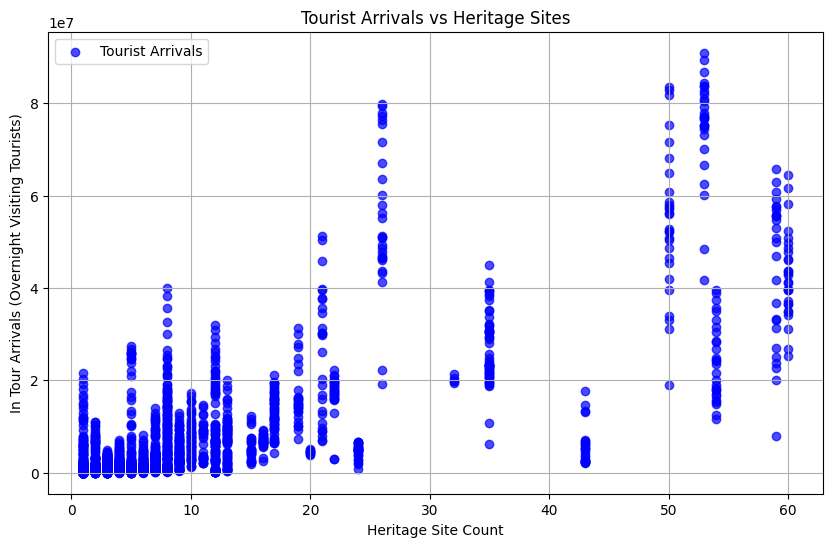

In [ ]:
# Plot the graph
import matplotlib.pyplot as plt

x = results['heritage_site_count']
y = results['in_tour_arrivals_ovn_vis_tourists']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Tourist Arrivals')
plt.title('Tourist Arrivals vs Heritage Sites')
plt.xlabel('Heritage Site Count')
plt.ylabel('In Tour Arrivals (Overnight Visiting Tourists)')
plt.legend()
plt.grid(True)
plt.show()

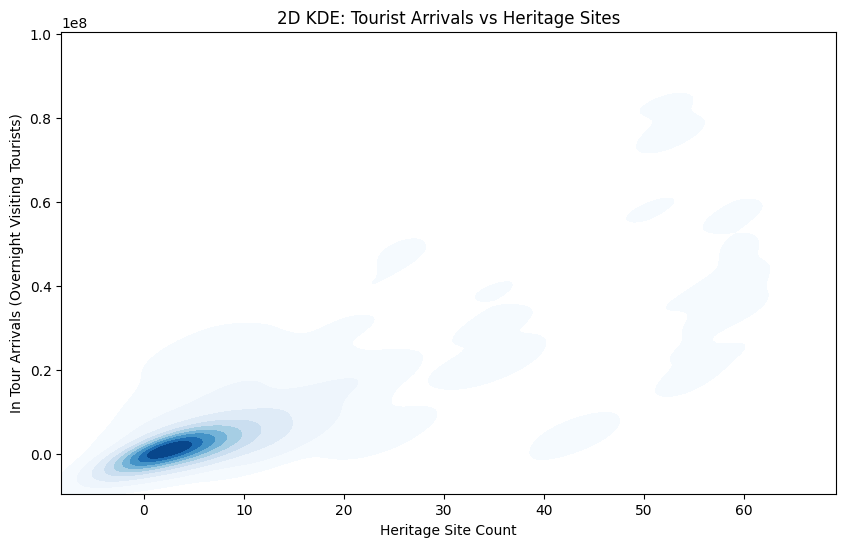

In [ ]:
# Plot the graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=results,
    x='heritage_site_count',
    y='in_tour_arrivals_ovn_vis_tourists',
    cmap='Blues',
    fill=True,
    thresh=0.05
)
plt.title('2D KDE: Tourist Arrivals vs Heritage Sites')
plt.xlabel('Heritage Site Count')
plt.ylabel('In Tour Arrivals (Overnight Visiting Tourists)')
plt.show()

### Correlation Matrix

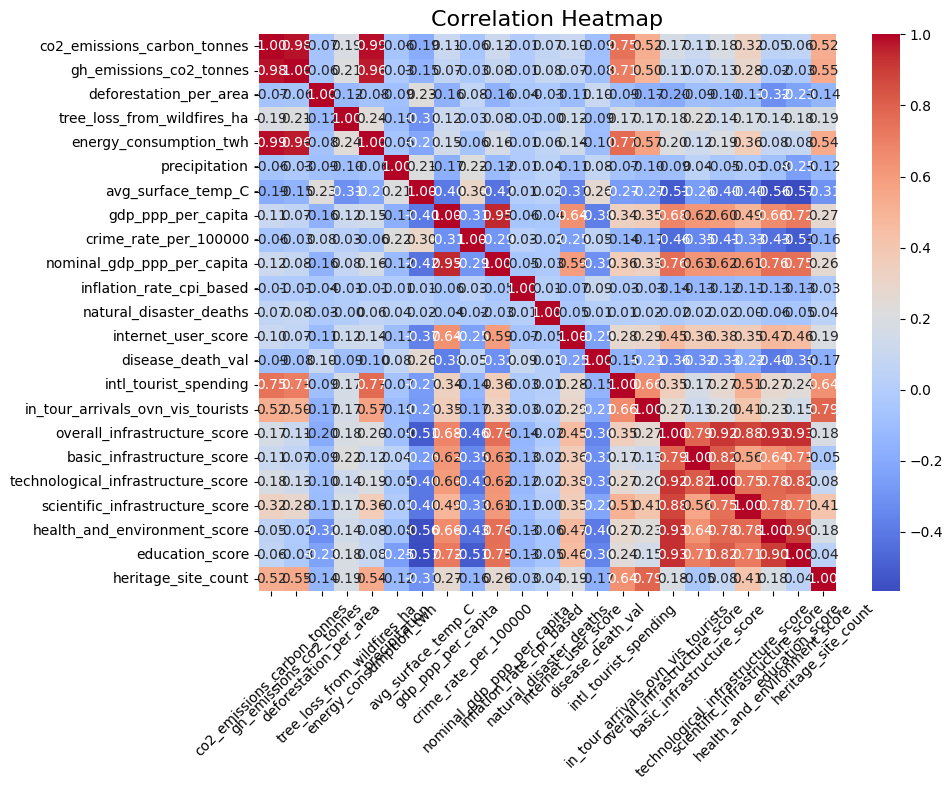

In [ ]:
# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = [
    'co2_emissions_carbon_tonnes',
       'gh_emissions_co2_tonnes', 'deforestation_per_area',
       'tree_loss_from_wildfires_ha', 'energy_consumption_twh',
       'precipitation', 'avg_surface_temp_C', 'gdp_ppp_per_capita',
       'crime_rate_per_100000', 'nominal_gdp_ppp_per_capita',
       'inflation_rate_cpi_based', 'natural_disaster_deaths',
       'internet_user_score', 'disease_death_val', 'intl_tourist_spending',
       'in_tour_arrivals_ovn_vis_tourists', 'overall_infrastructure_score',
       'basic_infrastructure_score', 'technological_infrastructure_score',
       'scientific_infrastructure_score', 'health_and_environment_score',
       'education_score', 'heritage_site_count'
]

numeric_df = results[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Create the random forest regressor
import pandas as pd
from pandas_gbq import to_gbq

results = results.dropna(subset=['in_tour_arrivals_ovn_vis_tourists', 'overall_infrastructure_score'])

impute_array = []

for column in results.columns:
    if results[column].count() < results['name'].count():
      impute_array.append(column)

import pandas as pd
from fancyimpute import IterativeImputer

# Use IterativeImputer (MICE) to fill the missing values
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(results[impute_array])

results[impute_array] = imputed_data

# Loop through the columns and convert non-numeriacl to numerical
for column in results.select_dtypes(include=['object']).columns:
  results[column] = results[column].astype('category').cat.codes

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = results

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])
y = data['in_tour_arrivals_ovn_vis_tourists']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Calculate MAE
relative_mae = mae / y_test.mean()
print(f"Relative Mean Absolute Error (Relative MAE): {relative_mae}")

from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)

<ipython-input-44-e26cd29600be>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results[impute_array] = imputed_data
<ipython-input-44-e26cd29600be>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results[column] = results[column].astype('category').cat.codes


Mean Absolute Error (MAE): 1622428.5574110032
Mean Squared Error (MSE): 11080648248315.809
R² Score: 0.9592809781559739
Relative Mean Absolute Error (Relative MAE): 0.1335536616322851
Mean Absolute Percentage Error (MAPE): 0.35984076201895293


In [ ]:
# Make prediction
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
to_gbq(rf_df, destination_table='travel_dataset.model_results', if_exists='replace')
rf_df

100%|██████████| 1/1 [00:00<00:00, 6472.69it/s]


,Actual,Predicted
3990,27047000.0,30934990.0
2690,2384000.0,1988590.0
3679,2960000.0,13550934.0
2518,386000.0,436069.0
3458,5560000.0,5617520.0
...,...,...
3636,20273000.0,17651120.0
3047,1505600.0,1846960.0
3656,17669000.0,18049310.0
3043,2417000.0,1818350.0


In [ ]:
# Improve the model with pre-set feature selection
import pandas as pd

results = results.dropna(subset=['in_tour_arrivals_ovn_vis_tourists', 'overall_infrastructure_score'])

impute_array = []

for column in results.columns:
    if results[column].count() < results['name'].count():
      impute_array.append(column)

# Loop through the columns and convert non-numeriacl to numerical
for column in results.select_dtypes(include=['object']).columns:
  results[column] = results[column].astype('category').cat.codes

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = results

# Define features (X) and target (y)
X = data[['name', 'year', 'gdp_ppp_per_capita', 'internet_user_score',
       'disease_death_val', 'overall_infrastructure_score',
       'scientific_infrastructure_score', 'health_and_environment_score',
       'education_score', 'heritage_site_count']]
y = data['in_tour_arrivals_ovn_vis_tourists']

# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Calculate Relative MAE
relative_mae = mae / y_test.mean()
print(f"Relative Mean Absolute Error (Relative MAE): {relative_mae}")

from sklearn.metrics import mean_absolute_percentage_error

# Calculate Relative MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 1267705.7543689322
Mean Squared Error (MSE): 9871210860152.375
R² Score: 0.9637254029156078
Relative Mean Absolute Error (Relative MAE): 0.10435389872479872
Mean Absolute Percentage Error (MAPE): 0.32171794476625315


In [ ]:
# Make prediction
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
3990,27047000.0,28258110.0
2690,2384000.0,1926040.0
3679,2960000.0,17286184.0
2518,386000.0,470009.0
3458,5560000.0,5356950.0
...,...,...
3636,20273000.0,18347350.0
3047,1505600.0,1538740.0
3656,17669000.0,16903050.0
3043,2417000.0,1907870.0


# Model performance with different epochs

### Less Epochs

In [ ]:
# Train neural net for 50 epochs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = results

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])
y = data['in_tour_arrivals_ovn_vis_tourists']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.2), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Model Evaluation")
print("Mean Absolute Error (MAE):", mae_nn)
print("Mean Squared Error (MSE):", mse_nn)
print("R² Score:", r2_nn)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 317876871364608.0000 - val_loss: 111796211941376.0000
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96644968218624.0000 - val_loss: 74612540964864.0000
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64689446846464.0000 - val_loss: 104697570525184.0000
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71241931161600.0000 - val_loss: 127266910633984.0000
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59868383805440.0000 - val_loss: 89802221289472.0000
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56580556980224.0000 - val_loss: 50744287821824.0000
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57859668705280.0000 - val_loss: 58550583820288.0000
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57490574147584.0000 - val_loss: 50196549468160.0000
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46345855434752.0000 - val_loss: 61572282056704.0000
Epoch 10/50
99/99

### More Epochs


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 360824866603008.0000 - val_loss: 210210295644160.0000
Epoch 2/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117184130973696.0000 - val_loss: 93848155979776.0000
Epoch 3/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84955057094656.0000 - val_loss: 112868561256448.0000
Epoch 4/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76874109681664.0000 - val_loss: 75913815392256.0000
Epoch 5/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73958044991488.0000 - val_loss: 74410501341184.0000
Epoch 6/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66456922357760.0000 - val_loss: 59021784514560.0000
Epoch 7/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52916656275456.0000 - val_loss: 57094082396160.0000
Epoch 8/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51774731845632.0000 - val_loss: 51962913488896.0000
Epoch 9/150
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53172873723904.0000 - val_loss: 51153270210560.0000
Epoch 10/

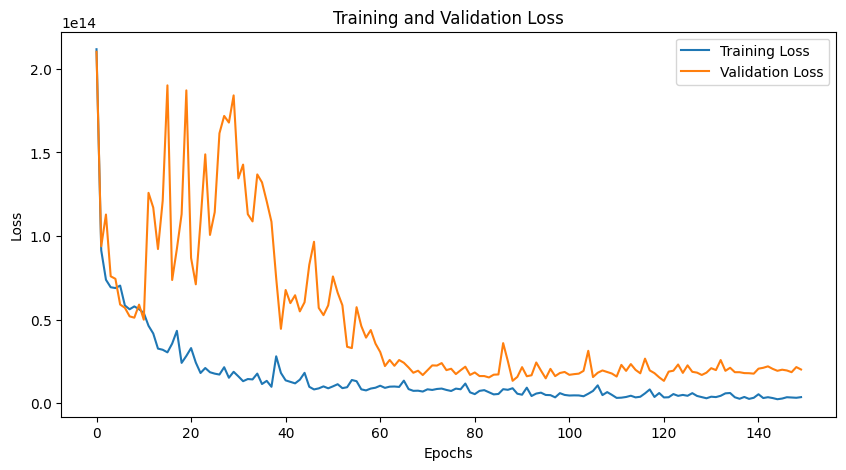

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Neural Network Model Evaluation
Mean Absolute Error (MAE): 1674398.6208535598
Mean Squared Error (MSE): 14425482513464.334
R² Score: 0.9469894247689299


In [ ]:
# Train neural net for 150 epochs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
data = results

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])
y = data['in_tour_arrivals_ovn_vis_tourists']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.2), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2, verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Model Evaluation")
print("Mean Absolute Error (MAE):", mae_nn)
print("Mean Squared Error (MSE):", mse_nn)
print("R² Score:", r2_nn)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = results

# Drop N/A values
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])
y = data['in_tour_arrivals_ovn_vis_tourists']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Model Evaluation")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)
    print("-----------\n")


# Linear Regression
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test)

# K-Nearest Neighbors
knn = KNeighborsRegressor()
evaluate_model(knn, X_train, X_test, y_train, y_test)

# Support Vector Machine
svr = SVR()
evaluate_model(svr, X_train, X_test, y_train, y_test)

# Gradient Boosting Machines
gbm = GradientBoostingRegressor(random_state=42)
evaluate_model(gbm, X_train, X_test, y_train, y_test)

LinearRegression Model Evaluation
Mean Absolute Error (MAE): 5412527.538189317
Mean Squared Error (MSE): 64463293133019.79
R² Score: 0.7631111301073694
-----------

KNeighborsRegressor Model Evaluation
Mean Absolute Error (MAE): 6321884.029773463
Mean Squared Error (MSE): 114770938584094.48
R² Score: 0.5782412499218681
-----------

SVR Model Evaluation
Mean Absolute Error (MAE): 9864713.500480719
Mean Squared Error (MSE): 318323938901731.5
R² Score: -0.1697726641206343
-----------

GradientBoostingRegressor Model Evaluation
Mean Absolute Error (MAE): 2089107.5479502636
Mean Squared Error (MSE): 12102237776527.832
R² Score: 0.9555268542651433
-----------



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = results

# Drop N/A values
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])
y = data['in_tour_arrivals_ovn_vis_tourists']

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Model Evaluation")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)
    print("-----------\n")

# Linear Regression
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test)

# K-Nearest Neighbors
knn = KNeighborsRegressor()
evaluate_model(knn, X_train, X_test, y_train, y_test)

# Support Vector Machine
svr = SVR()
evaluate_model(svr, X_train, X_test, y_train, y_test)

# Gradient Boosting Machines
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42)
gbm = GradientBoostingRegressor(random_state=42)
evaluate_model(gbm, X_train_tree, X_test_tree, y_train_tree, y_test_tree)

LinearRegression Model Evaluation
Mean Absolute Error (MAE): 5412527.687716132
Mean Squared Error (MSE): 64463295196089.76
R² Score: 0.7631111225260268
-----------

KNeighborsRegressor Model Evaluation
Mean Absolute Error (MAE): 1773772.5320388353
Mean Squared Error (MSE): 15351370533921.428
R² Score: 0.9435869835321689
-----------

SVR Model Evaluation
Mean Absolute Error (MAE): 9864743.412258504
Mean Squared Error (MSE): 318324747665988.75
R² Score: -0.16977563615699176
-----------

GradientBoostingRegressor Model Evaluation
Mean Absolute Error (MAE): 2089107.5479502636
Mean Squared Error (MSE): 12102237776527.832
R² Score: 0.9555268542651433
-----------



# Example 2: Query a table with BigQuery DataFrames

In [ ]:
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

bf.options.bigquery.location = "us-central1" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "phonic-sunbeam-443308-r6" #this variable is set based on the dataset you chose to query

In [ ]:
df = bf.read_gbq("phonic-sunbeam-443308-r6.travel_dataset.ml_features") #this variable is set based on the dataset you chose to query

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2024-12-19 04:18:19.518516+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(20)

,name,year,co2_emissions_carbon_tonnes,gh_emissions_co2_tonnes,deforestation_per_area,tree_loss_from_wildfires_ha,energy_consumption_twh,precipitation,avg_surface_temp_C,gdp_ppp_per_capita,...,disease_death_val,intl_tourist_spending,in_tour_arrivals_ovn_vis_tourists,overall_infrastructure_score,basic_infrastructure_score,technological_infrastructure_score,scientific_infrastructure_score,health_and_environment_score,education_score,heritage_site_count
0,Slovenia,2009,16204107.0,23418116.0,<NA>,46.615616,86.41146,1357.3389,10.461566,33052.227,...,27.356538,2012029700.0,1824000.0,48.0,38.6,43.2,44.3,49.1,55.7,5
1,Cameroon,2010,8383322.0,73933256.0,0.277506,1.899717,37.49299,1632.7198,25.1211,3298.6245,...,119.041027,231135550.0,569000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2
2,Oman,2003,34356268.0,68865980.0,<NA>,<NA>,136.07596,35.511726,27.95134,36256.348,...,14.610155,927987000.0,1039000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5
3,Kyrgyzstan,2020,8348492.5,18795530.0,<NA>,<NA>,67.0747,892.2955,0.445895,4790.6587,...,102.544197,93181090.0,69000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3
4,Mongolia,2013,43478036.0,78691540.0,<NA>,459.05975,58.388344,255.78621,1.582515,10504.814,...,47.502008,674641200.0,418000.0,14.4,36.7,34.8,10.5,21.6,27.1,6
5,Vanuatu,1998,76944.0,1386787.0,<NA>,<NA>,0.211666,1991.3599,25.312239,2916.0752,...,61.909689,13298450.0,52000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
6,Peru,2007,34305970.0,151613940.0,<NA>,424.4558,180.28453,2065.724,18.675331,8548.6045,...,62.738097,1265050900.0,1916000.0,15.2,36.4,22.1,21.0,28.2,25.4,13
7,Peru,2011,42173068.0,156815800.0,<NA>,347.95035,248.55608,2144.9683,18.657545,10539.982,...,68.409401,1633486100.0,2598000.0,15.2,36.4,22.1,21.0,28.2,25.4,13
8,Nicaragua,2006,4418076.0,57781250.0,<NA>,3.309558,19.881092,1631.9913,25.429125,4426.0063,...,24.29308,182804600.0,749000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2
9,India,2003,1067736960.0,2085137200.0,<NA>,373.053,4008.7097,1225.7537,24.12349,2861.5747,...,98.75861,5280688000.0,2726000.0,31.1,44.9,43.4,48.1,22.3,21.7,43


In [ ]:
print("working here")

working here
